<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/DataMining_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files

uploaded = files.upload()


Saving 한국철도공사_KTX 상하행 역별 승하차_20231231.csv to 한국철도공사_KTX 상하행 역별 승하차_20231231 (1).csv


In [41]:
from google.colab import files

uploaded = files.upload()


Saving 한국철도공사_역별 타 교통수단과 연계시설현황_20221231.csv to 한국철도공사_역별 타 교통수단과 연계시설현황_20221231 (1).csv


In [39]:
import io
df = pd.read_csv(io.BytesIO(uploaded['한국철도공사_KTX 상하행 역별 승하차_20231231 (1).csv']), encoding='utf-8', thousands = ',')
df

KeyError: '한국철도공사_KTX 상하행 역별 승하차_20231231 (1).csv'

In [43]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['한국철도공사_역별 타 교통수단과 연계시설현황_20221231 (1).csv']), encoding='utf-8', thousands = ',')
df2

,역명,KTX역수,일반철도역수,광역철도역수,도시철도역수,환승주차장(면수)
0,대전,1,1,0,1,696
1,동대구,1,1,0,1,414
2,부산,1,1,0,1,688
3,신경주,1,1,0,0,357
4,오송,1,1,0,0,437
...,...,...,...,...,...,...
61,행신,1,0,1,0,0
62,가남,1,0,0,0,0
63,감곡장호원,1,0,0,0,0
64,앙성온천,1,0,0,0,0


In [8]:
df['month'] = df['운행년월'].str[-3:]


In [9]:
df['전체인원수'] = df['하행_승차인원수'] + df['하행_하차인원수'] + df['상행_승차인원수'] + df['상행_하차인원수']

In [10]:
df.reset_index(inplace = True)
df

,index,운행년월,정차역,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,month,전체인원수
0,0,2010년 1월,서울,837659,103,263,893007,1월,1731032
1,1,2010년 1월,용산,183799,19,86,202844,1월,386748
2,2,2010년 1월,영등포,0,0,0,1,1월,1
3,3,2010년 1월,수원,1,0,0,4,1월,5
4,4,2010년 1월,대전,127187,214317,226219,129055,1월,696778
...,...,...,...,...,...,...,...,...,...
6948,6948,2023년 12월,울산,18260,183466,178123,20504,12월,400353
6949,6949,2023년 12월,창원중앙,3164,79919,80791,4123,12월,167997
6950,6950,2023년 12월,공주,4627,8292,8437,4470,12월,25826
6951,6951,2023년 12월,포항,0,118825,115143,0,12월,233968


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6953 non-null   int64 
 1   운행년월      6953 non-null   object
 2   정차역       6953 non-null   object
 3   하행_승차인원수  6953 non-null   int64 
 4   하행_하차인원수  6953 non-null   int64 
 5   상행_승차인원수  6953 non-null   int64 
 6   상행_하차인원수  6953 non-null   int64 
 7   month     6953 non-null   object
 8   전체인원수     6953 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 489.0+ KB


In [16]:
df.describe()

,index,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,전체인원수
count,6953.000000,6.953000e+03,6953.000000,6953.000000,6.953000e+03,6.953000e+03
mean,3476.000000,5.772661e+04,57447.839638,57938.825543,5.822495e+04,2.313382e+05
std,2007.302543,1.808991e+05,105066.022322,105932.492459,1.835400e+05,4.182241e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00
25%,1738.000000,1.860000e+02,3802.000000,3881.000000,1.760000e+02,1.802600e+04
50%,3476.000000,1.697000e+03,17233.000000,17189.000000,1.609000e+03,6.692000e+04
75%,5214.000000,1.981600e+04,54625.000000,55251.000000,1.919900e+04,1.904880e+05
max,6952.000000,1.484629e+06,693168.000000,710283.000000,1.510619e+06,2.943311e+06


In [17]:
df['정차역'].unique()

array(['서울', '용산', '영등포', '수원', '대전', '동대구', '경산', '밀양', '구포', '부산',
       '서대전', '계룡', '논산', '익산', '김제', '정읍', '장성', '광주송정', '나주', '목포',
       '전주', '순천', '여천', '여수엑스포', '충주', '행신', '창원', '마산', '광명', '천안아산',
       '남원', '진영', '구례구', '강릉', '울산', '오송', '김천구미', '신경주', '곡성', '창원중앙',
       '제천', '진주', '묵호', '포항', '공주', '양평', '만종', '청량리', '상봉', '횡성', '둔내',
       '평창', '진부', '동해', '정동진', '경주', '서원주', '봉화', '인천공항T1', '수서', '전의',
       '서대구', '김천', '보성', '단양', '홍성', '왜관', '대구', '영천', '함평', '구미', '천안',
       '물금'], dtype=object)

In [18]:
len(df['정차역'].unique())

73

In [11]:
df[[ '정차역', '하행_승차인원수']].groupby('정차역').mean().sort_values(by = '하행_승차인원수', ascending = False).head(10)


,하행_승차인원수
정차역,
서울,1.086020e+06
광명,3.223273e+05
용산,2.981911e+05
대전,1.421407e+05
동대구,1.249071e+05
천안아산,1.237157e+05
청량리,6.294159e+04
오송,5.977880e+04
행신,4.772060e+04


In [26]:
df[[ '정차역', '상행_하차인원수']].groupby('정차역').mean().sort_values(by = '상행_하차인원수', ascending = False).head(10)


,상행_하차인원수
정차역,
서울,1.101833e+06
광명,3.235891e+05
용산,3.100886e+05
대전,1.408289e+05
동대구,1.248564e+05
천안아산,1.208007e+05
청량리,5.987670e+04
오송,5.925426e+04
수원,4.602068e+04


In [13]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.1 MB/s eta 0:00:00


<Axes: xlabel='정차역'>

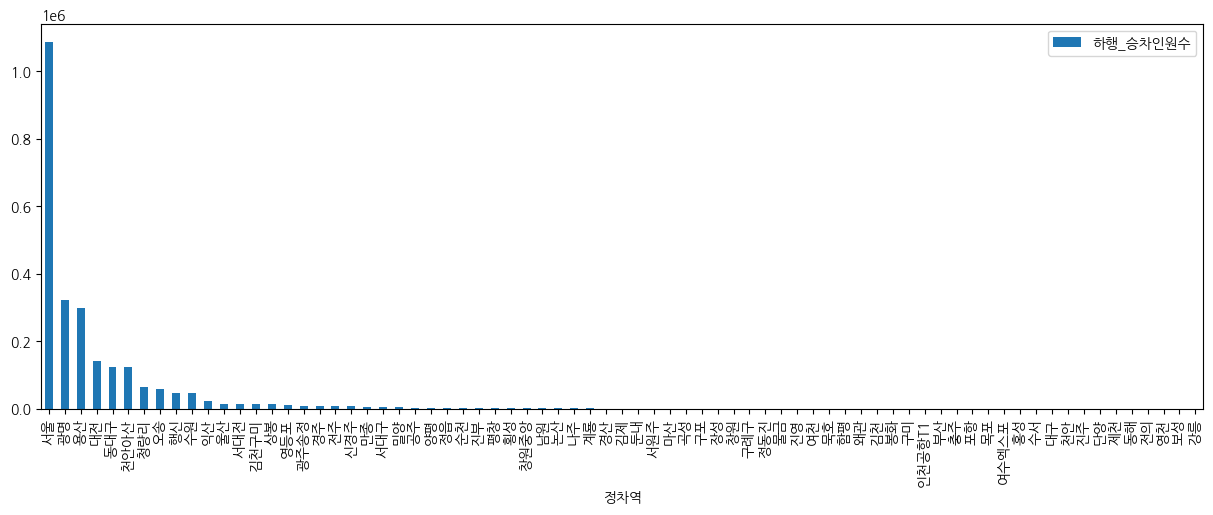

In [14]:
df[[ '정차역', '하행_승차인원수']].groupby('정차역').mean().sort_values(by = '하행_승차인원수', ascending = False).plot(kind = 'bar', figsize = (15, 5))


<Axes: xlabel='정차역'>

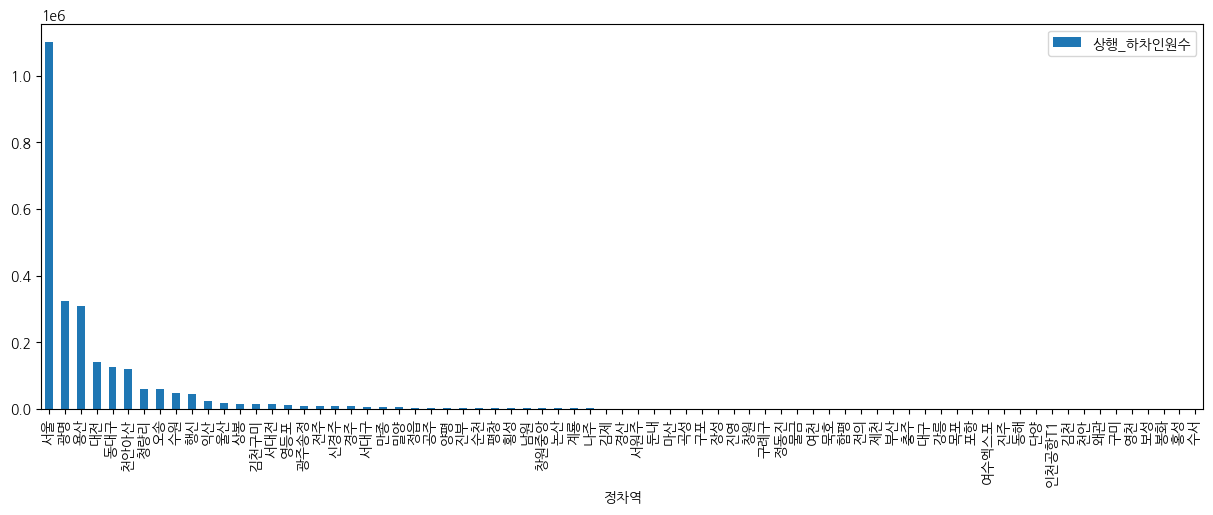

In [19]:
df[[ '정차역', '상행_하차인원수']].groupby('정차역').mean().sort_values(by = '상행_하차인원수', ascending = False).plot(kind = 'bar', figsize = (15, 5))


In [28]:
df[[ '정차역', '하행_하차인원수']].groupby('정차역').mean().sort_values(by = '하행_하차인원수', ascending = False).head(10)


,하행_하차인원수
정차역,
부산,501456.464286
동대구,368681.416667
대전,258127.113095
울산,162226.503145
천안아산,133749.845238
오송,120672.632911
광주송정,114213.440476
강릉,94007.755102
포항,86690.094340


<Axes: xlabel='정차역'>

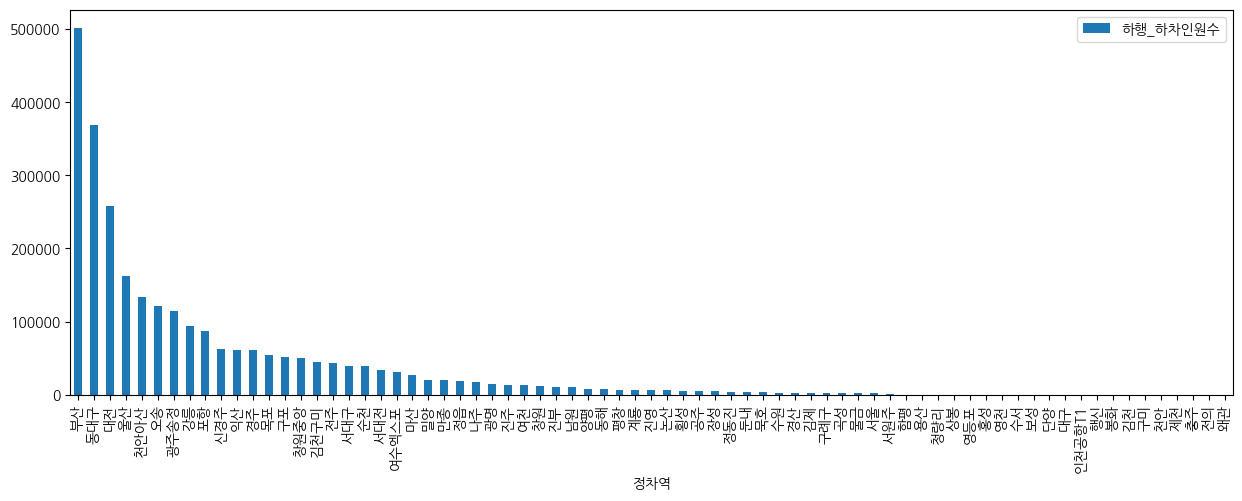

In [20]:
df[[ '정차역', '하행_하차인원수']].groupby('정차역').mean().sort_values(by = '하행_하차인원수', ascending = False).plot(kind = 'bar', figsize = (15, 5))


In [29]:
df[[ '정차역', '상행_승차인원수']].groupby('정차역').mean().sort_values(by = '상행_승차인원수', ascending = False).head(10)


,상행_승차인원수
정차역,
부산,505777.732143
동대구,372455.190476
대전,259029.065476
울산,161345.295597
천안아산,131537.583333
오송,126558.354430
광주송정,113251.232143
강릉,97431.061224
포항,88295.075472


<Axes: xlabel='정차역'>

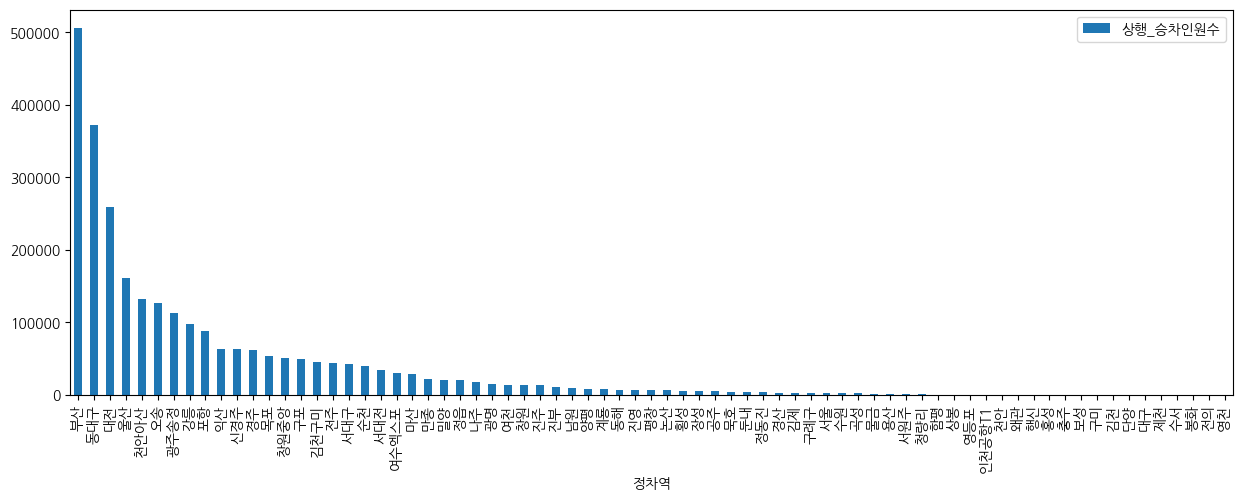

In [21]:
df[[ '정차역', '상행_승차인원수']].groupby('정차역').mean().sort_values(by = '상행_승차인원수', ascending = False).plot(kind = 'bar', figsize = (15, 5))


In [22]:
df[df['정차역'] == '서울'][['하행_승차인원수' , 'month']].groupby('month').mean()

,하행_승차인원수
month,
1월,1.048234e+06
2월,9.868824e+05
3월,9.744711e+05
4월,1.042737e+06
5월,1.139726e+06
6월,1.050940e+06
7월,1.089290e+06
8월,1.104992e+06
9월,1.067520e+06


<Axes: xlabel='month'>

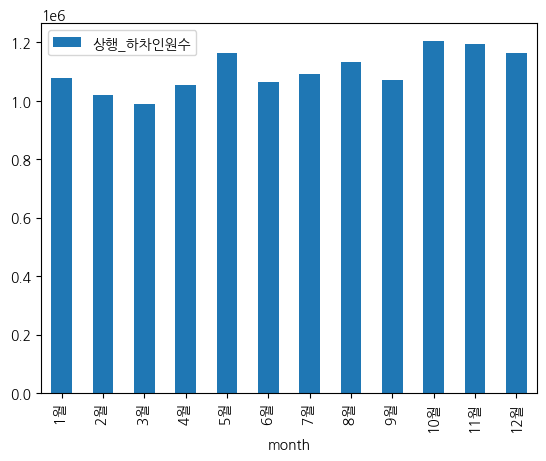

In [30]:
df[df['정차역'] == '서울'][['상행_하차인원수' , 'month']].groupby('month').mean().plot(kind = 'bar')


<Axes: xlabel='month'>

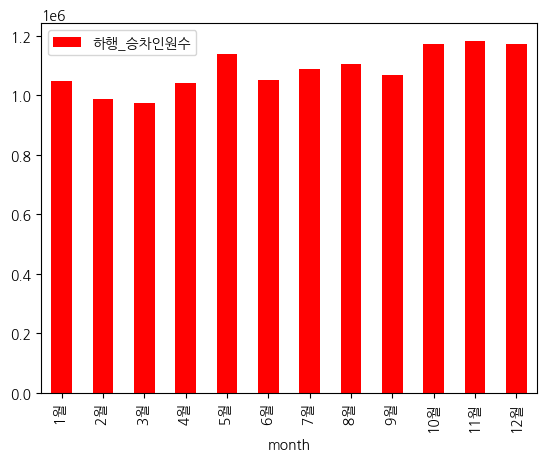

In [35]:
df[df['정차역'] == '서울'][['하행_승차인원수' , 'month']].groupby('month').mean().plot(kind = 'bar', color = 'r')


<Axes: xlabel='month'>

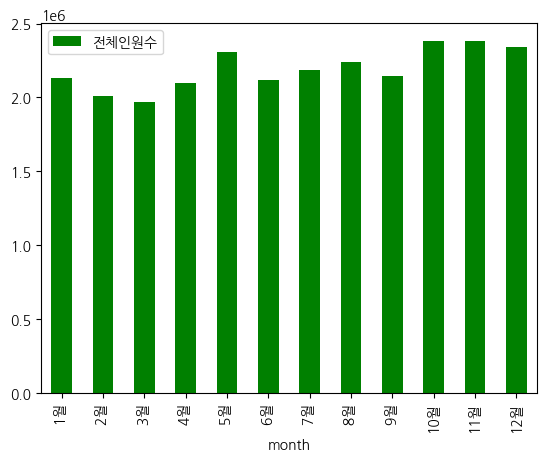

In [34]:
df[df['정차역'] == '서울'][['전체인원수' , 'month']].groupby('month').mean().plot(kind = 'bar', color = 'g')


In [24]:
df[df['정차역'] == '서울'].sort_values(by='index')

,index,운행년월,정차역,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,month,전체인원수
0,0,2010년 1월,서울,837659,103,263,893007,1월,1731032
30,30,2010년 2월,서울,833608,112,280,862858,2월,1696858
57,57,2010년 3월,서울,799282,105,217,837148,3월,1636752
83,83,2010년 4월,서울,824454,139,203,843712,4월,1668508
107,107,2010년 5월,서울,910079,114,262,943930,5월,1854385
...,...,...,...,...,...,...,...,...,...
6741,6741,2023년 8월,서울,1359126,3236,3165,1365684,8월,2731211
6783,6783,2023년 9월,서울,1360131,4198,3628,1288666,9월,2656623
6825,6825,2023년 10월,서울,1423275,4817,4600,1510619,10월,2943311
6867,6867,2023년 11월,서울,1433758,5041,4189,1436645,11월,2879633


<Axes: >

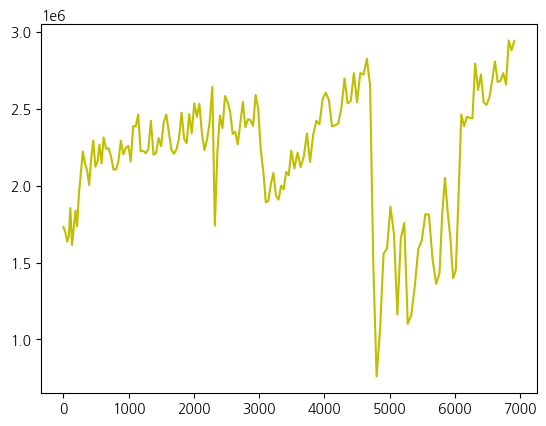

In [36]:
df[df['정차역'] == '서울'].sort_values(by='index')['전체인원수'].plot(color = 'y')

In [44]:
df2

,역명,KTX역수,일반철도역수,광역철도역수,도시철도역수,환승주차장(면수)
0,대전,1,1,0,1,696
1,동대구,1,1,0,1,414
2,부산,1,1,0,1,688
3,신경주,1,1,0,0,357
4,오송,1,1,0,0,437
...,...,...,...,...,...,...
61,행신,1,0,1,0,0
62,가남,1,0,0,0,0
63,감곡장호원,1,0,0,0,0
64,앙성온천,1,0,0,0,0


In [46]:
df2[df2['환승주차장(면수)'] != 0].head(10)

,역명,KTX역수,일반철도역수,광역철도역수,도시철도역수,환승주차장(면수)
0,대전,1,1,0,1,696
1,동대구,1,1,0,1,414
2,부산,1,1,0,1,688
3,신경주,1,1,0,0,357
4,오송,1,1,0,0,437
5,광주송정,1,1,0,1,1886
6,익산,1,1,0,0,508
7,정읍,1,1,0,0,271
8,경산,1,1,0,0,37
9,구포,1,1,0,1,49


In [47]:
df2 = df2[df2['환승주차장(면수)'] != 0]
df2

,역명,KTX역수,일반철도역수,광역철도역수,도시철도역수,환승주차장(면수)
0,대전,1,1,0,1,696
1,동대구,1,1,0,1,414
2,부산,1,1,0,1,688
3,신경주,1,1,0,0,357
4,오송,1,1,0,0,437
5,광주송정,1,1,0,1,1886
6,익산,1,1,0,0,508
7,정읍,1,1,0,0,271
8,경산,1,1,0,0,37
9,구포,1,1,0,1,49


In [49]:
df2.rename(columns = {'역명' : '정차역'}, inplace = True)
df2

<ipython-input-49-3a62bdd9cfdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {'역명' : '정차역'}, inplace = True)


,정차역,KTX역수,일반철도역수,광역철도역수,도시철도역수,환승주차장(면수)
0,대전,1,1,0,1,696
1,동대구,1,1,0,1,414
2,부산,1,1,0,1,688
3,신경주,1,1,0,0,357
4,오송,1,1,0,0,437
5,광주송정,1,1,0,1,1886
6,익산,1,1,0,0,508
7,정읍,1,1,0,0,271
8,경산,1,1,0,0,37
9,구포,1,1,0,1,49


In [74]:
df_merged = pd.merge(left= df, right = df2, how = 'left', on = '정차역')
df_merged

,index,운행년월,정차역,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,month,전체인원수,KTX역수,일반철도역수,광역철도역수,도시철도역수,환승주차장(면수)
0,0,2010년 1월,서울,837659,103,263,893007,1월,1731032,1.0,1.0,2.0,2.0,115.0
1,1,2010년 1월,용산,183799,19,86,202844,1월,386748,NaN,NaN,NaN,NaN,NaN
2,2,2010년 1월,영등포,0,0,0,1,1월,1,NaN,NaN,NaN,NaN,NaN
3,3,2010년 1월,수원,1,0,0,4,1월,5,NaN,NaN,NaN,NaN,NaN
4,4,2010년 1월,대전,127187,214317,226219,129055,1월,696778,1.0,1.0,0.0,1.0,696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,6948,2023년 12월,울산,18260,183466,178123,20504,12월,400353,1.0,0.0,1.0,0.0,779.0
6949,6949,2023년 12월,창원중앙,3164,79919,80791,4123,12월,167997,1.0,1.0,0.0,0.0,262.0
6950,6950,2023년 12월,공주,4627,8292,8437,4470,12월,25826,NaN,NaN,NaN,NaN,NaN
6951,6951,2023년 12월,포항,0,118825,115143,0,12월,233968,1.0,1.0,0.0,0.0,388.0


In [75]:
df_train =df_merged[df_merged['환승주차장(면수)'] >0][['정차역', '하행_승차인원수', '하행_하차인원수', '상행_승차인원수', '상행_하차인원수', '환승주차장(면수)']]
df_train

,정차역,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,환승주차장(면수)
0,서울,837659,103,263,893007,115.0
4,대전,127187,214317,226219,129055,696.0
5,동대구,85129,416075,436833,81403,414.0
6,경산,0,0,3,0,37.0
8,구포,336,125795,126044,265,49.0
...,...,...,...,...,...,...
6945,천안아산,179650,227438,209637,162004,1070.0
6948,울산,18260,183466,178123,20504,779.0
6949,창원중앙,3164,79919,80791,4123,262.0
6951,포항,0,118825,115143,0,388.0


In [95]:
df_test = df_merged[df_merged['환승주차장(면수)'].isnull()][['정차역', '하행_승차인원수', '하행_하차인원수', '상행_승차인원수', '상행_하차인원수']]
df_test

,정차역,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수
1,용산,183799,19,86,202844
2,영등포,0,0,0,1
3,수원,1,0,0,4
7,밀양,5739,45833,49264,4778
11,계룡,357,3971,4888,534
...,...,...,...,...,...
6934,구례구,285,3763,3728,247
6939,행신,91904,0,0,88763
6946,김천구미,25963,71529,70757,26037
6947,경주,11256,74437,75041,12168


In [96]:
df_test.groupby('정차역').mean()

,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수
정차역,,,,
경주,8143.166667,61138.777778,61249.833333,7710.166667
계룡,740.166667,6700.553571,7660.101190,789.267857
곡성,314.864865,1966.675676,1855.445946,322.162162
공주,2569.609524,4633.628571,4727.266667,2507.085714
구례구,135.641892,2120.844595,2049.033784,120.364865
구미,1.000000,0.000000,0.000000,0.000000
김제,495.172414,2456.327586,2381.612069,546.568966
김천,1.000000,0.000000,0.000000,0.000000
김천구미,14378.449367,44963.778481,45420.867089,14428.531646


In [97]:
df_test = df_test.groupby('정차역').mean()

In [93]:
train_features = df_train[['하행_승차인원수', '하행_하차인원수', '상행_승차인원수', '상행_하차인원수']]
train_target = df_train['환승주차장(면수)']
test_features = df_test[['하행_승차인원수', '하행_하차인원수', '상행_승차인원수', '상행_하차인원수']]

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(train_features, train_target, test_size=0.3, random_state=5)

In [109]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('Training accuracy : {:.3f}'.format(lr.score(X_train, y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(X_test, y_test)))

Training accuracy : 0.164
Test accuracy : 0.173


In [110]:
df_test['pred_lr'] = lr.predict(test_features)
df_test

,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,pred_lr,pred_dt,pred_knn,Suggestion
정차역,,,,,,,,
경주,8143.166667,61138.777778,61249.833333,7710.166667,333.683902,150.000000,274.2,252.607454
계룡,740.166667,6700.553571,7660.101190,789.267857,249.251329,37.000000,37.0,106.983844
곡성,314.864865,1966.675676,1855.445946,322.162162,252.688876,37.000000,73.0,120.349807
공주,2569.609524,4633.628571,4727.266667,2507.085714,255.057168,112.000000,76.0,147.117282
구례구,135.641892,2120.844595,2049.033784,120.364865,252.607390,100.000000,73.0,141.311395
구미,1.000000,0.000000,0.000000,0.000000,249.007326,62.000000,203.4,170.872720
김제,495.172414,2456.327586,2381.612069,546.568966,252.861437,64.000000,37.0,117.407514
김천,1.000000,0.000000,0.000000,0.000000,249.007326,62.000000,203.4,170.872720
김천구미,14378.449367,44963.778481,45420.867089,14428.531646,307.559457,508.000000,508.0,440.986712


In [116]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=5)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)


print("훈련 세트 정확도: {:.2f}".format(dt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.2f}".format(dt.score(X_test,y_test)))


훈련 세트 정확도: 1.00
테스트 세트 정확도:0.81


In [113]:
df_test['pred_dt'] = dt.predict(test_features)
df_test

,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,pred_lr,pred_dt,pred_knn,Suggestion
정차역,,,,,,,,
경주,8143.166667,61138.777778,61249.833333,7710.166667,333.683902,150.000000,274.2,252.607454
계룡,740.166667,6700.553571,7660.101190,789.267857,249.251329,37.000000,37.0,106.983844
곡성,314.864865,1966.675676,1855.445946,322.162162,252.688876,37.000000,73.0,120.349807
공주,2569.609524,4633.628571,4727.266667,2507.085714,255.057168,112.000000,76.0,147.117282
구례구,135.641892,2120.844595,2049.033784,120.364865,252.607390,64.000000,73.0,141.311395
구미,1.000000,0.000000,0.000000,0.000000,249.007326,62.000000,203.4,170.872720
김제,495.172414,2456.327586,2381.612069,546.568966,252.861437,64.000000,37.0,117.407514
김천,1.000000,0.000000,0.000000,0.000000,249.007326,62.000000,203.4,170.872720
김천구미,14378.449367,44963.778481,45420.867089,14428.531646,307.559457,508.000000,508.0,440.986712


In [114]:
# K-Nearest Neighbors 모델
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = dt.predict(X_test)


print("훈련 세트 정확도: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(X_test,y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도:0.84


In [115]:
df_test['pred_knn'] = pred_knn
df_test

,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,pred_lr,pred_dt,pred_knn,Suggestion
정차역,,,,,,,,
경주,8143.166667,61138.777778,61249.833333,7710.166667,333.683902,150.000000,274.2,252.607454
계룡,740.166667,6700.553571,7660.101190,789.267857,249.251329,37.000000,37.0,106.983844
곡성,314.864865,1966.675676,1855.445946,322.162162,252.688876,37.000000,73.0,120.349807
공주,2569.609524,4633.628571,4727.266667,2507.085714,255.057168,112.000000,76.0,147.117282
구례구,135.641892,2120.844595,2049.033784,120.364865,252.607390,64.000000,73.0,141.311395
구미,1.000000,0.000000,0.000000,0.000000,249.007326,62.000000,203.4,170.872720
김제,495.172414,2456.327586,2381.612069,546.568966,252.861437,64.000000,37.0,117.407514
김천,1.000000,0.000000,0.000000,0.000000,249.007326,62.000000,203.4,170.872720
김천구미,14378.449367,44963.778481,45420.867089,14428.531646,307.559457,508.000000,508.0,440.986712


In [104]:
df_test['Suggestion'] = (df_test['pred_lr'] + df_test['pred_dt'] + df_test['pred_knn'])/3
df_test

,하행_승차인원수,하행_하차인원수,상행_승차인원수,상행_하차인원수,pred_lr,pred_dt,pred_knn,Suggestion
정차역,,,,,,,,
경주,8143.166667,61138.777778,61249.833333,7710.166667,333.622363,150.000000,274.2,252.607454
계룡,740.166667,6700.553571,7660.101190,789.267857,246.951532,37.000000,37.0,106.983844
곡성,314.864865,1966.675676,1855.445946,322.162162,251.049422,37.000000,73.0,120.349807
공주,2569.609524,4633.628571,4727.266667,2507.085714,253.351847,112.000000,76.0,147.117282
구례구,135.641892,2120.844595,2049.033784,120.364865,250.934184,100.000000,73.0,141.311395
구미,1.000000,0.000000,0.000000,0.000000,247.218160,62.000000,203.4,170.872720
김제,495.172414,2456.327586,2381.612069,546.568966,251.222541,64.000000,37.0,117.407514
김천,1.000000,0.000000,0.000000,0.000000,247.218160,62.000000,203.4,170.872720
김천구미,14378.449367,44963.778481,45420.867089,14428.531646,306.960135,508.000000,508.0,440.986712


In [122]:
df_final = df_test[  'pred_knn']
df_final = pd.DataFrame(df_final).sort_values(by = 'pred_knn', ascending = False)
df_final

,pred_knn
정차역,
용산,984.0
김천구미,508.0
청량리,385.8
행신,334.6
수원,334.6
천안,331.2
인천공항T1,331.2
왜관,297.6
경주,274.2


<Axes: xlabel='정차역'>

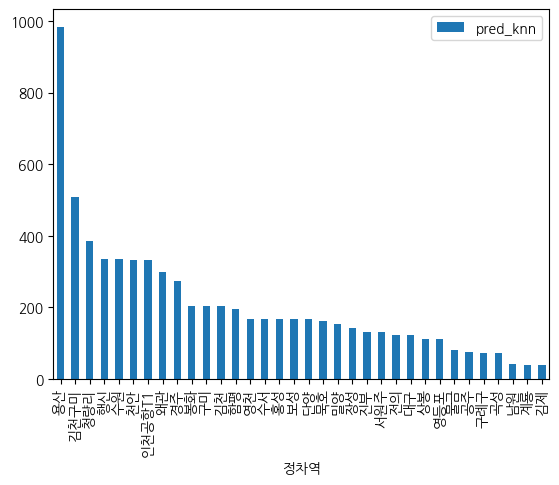

In [125]:
df_final.plot(kind = 'bar')